In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [13]:
df = pd.read_csv('jewelry.csv')

In [14]:
df.head()
#no columns, add columns
columns = ['order_date','order_id','user_id','purchase','category_id','category','brand','price','price_id','buyer','colour1','colour2','type']
df.columns = columns

In [15]:
print(df.head())

                order_date             order_id              user_id  \
0  2018-12-01 17:38:31 UTC  1924899396621697920  1806829193678291446   
1  2018-12-02 13:53:42 UTC  1925511016616034733  1842214461889315556   
2  2018-12-02 17:44:02 UTC  1925626951238681511  1835566849434059453   
3  2018-12-02 21:30:19 UTC  1925740842841014667  1873936840742928865   
4  2018-12-02 22:09:34 UTC  1925760595336888995  1835566854827934449   

   purchase   category_id          category  brand   price      price_id  \
0         1  1.806829e+18               NaN    NaN  212.14  1.515916e+18   
1         1  1.806829e+18   jewelry.pendant    1.0   54.66  1.515916e+18   
2         1  1.806829e+18   jewelry.pendant    0.0   88.90  1.515916e+18   
3         1  1.806829e+18  jewelry.necklace    0.0  417.67  1.515916e+18   
4         1  1.806829e+18   jewelry.earring    1.0  102.27  1.515916e+18   

  buyer colour1 colour2      type  
0   NaN  yellow    gold       NaN  
1     f   white    gold  sapphire  
2 

In [16]:
df.drop(columns=['order_id','user_id','category_id','price_id'],inplace=True)

In [17]:
df.head()

,order_date,purchase,category,brand,price,buyer,colour1,colour2,type
0,2018-12-01 17:38:31 UTC,1,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [18]:
print(df['purchase'].nunique(),df['brand'].nunique())

1 2537


In [19]:
df.drop(columns='purchase',inplace=True)
df.head()

,order_date,category,brand,price,buyer,colour1,colour2,type
0,2018-12-01 17:38:31 UTC,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [20]:
import datetime as dt
# import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['order_date']).dt.date
df['date']

0        2018-12-01
1        2018-12-02
2        2018-12-02
3        2018-12-02
4        2018-12-02
            ...    
95905    2021-12-01
95906    2021-12-01
95907    2021-12-01
95908    2021-12-01
95909    2021-12-01
Name: date, Length: 95910, dtype: object

In [21]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['year'][:5]

0    2018
1    2018
2    2018
3    2018
4    2018
Name: year, dtype: int64

In [22]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['month'][:5]

0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int64

In [23]:
#12 months, all clear
df['month'].nunique()

12

In [24]:
df['price'].fillna(0,inplace=True)
df['price'].isna().sum()

0

In [25]:
df['price'].map({'inf':0,'NaN':0})

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
95905   NaN
95906   NaN
95907   NaN
95908   NaN
95909   NaN
Name: price, Length: 95910, dtype: float64

In [26]:
df['price'] = df['price'].astype(int)
df['price'].head()

0    212
1     54
2     88
3    417
4    102
Name: price, dtype: int32

In [27]:
df['category'] = df['category'].str.strip()
df['category'].nunique()

218

In [28]:
df.head(5)

,order_date,category,brand,price,buyer,colour1,colour2,type,date,year,month
0,2018-12-01 17:38:31 UTC,NaN,NaN,212,NaN,yellow,gold,NaN,2018-12-01,2018,12
1,2018-12-02 13:53:42 UTC,jewelry.pendant,1.0,54,f,white,gold,sapphire,2018-12-02,2018,12
2,2018-12-02 17:44:02 UTC,jewelry.pendant,0.0,88,f,red,gold,diamond,2018-12-02,2018,12
3,2018-12-02 21:30:19 UTC,jewelry.necklace,0.0,417,NaN,red,gold,amethyst,2018-12-02,2018,12
4,2018-12-02 22:09:34 UTC,jewelry.earring,1.0,102,NaN,red,gold,NaN,2018-12-02,2018,12


In [29]:
#there is a dot notation to the category column

df['category'] =  df['category'].str.split('.')
df['sub_category'] = df['category'].str[1]


In [30]:
df['sub_category'].unique()

array([nan, 'pendant', 'necklace', 'earring', 'ring', 'brooch',
       'bracelet', 'clocks', 'souvenir', '12', '36', '03', '78', '62',
       '27', '25', '16', '37', '22', '55', '82', '15', '45', '47', '38',
       '44', '08', '97', '73', '90', '10', '49', '33', '75', '01', '95',
       'stud', '56', '07', '53', '18', '89', '66', '58', '19', '21', '04',
       '26', '52', '88', '23', '93', '77', '92', '48', '11', '84', '68',
       '85', '05', '51', '81', '74', '42', '79', '70', '40', '41', '59',
       '30', '96', '71', '60', '34', '67', '99', '64', '63', '00', '76'],
      dtype=object)

In [31]:
#it appears there are codes as well in this column, 
#let us try extract the better known jewelry types

jewelry_list = ['pendant', 'necklace', 'earring', 'ring', 'brooch','bracelet', 'clocks', 'souvenir']
df = df[df['sub_category'].isin(jewelry_list)]

In [32]:
df['sub_category'].value_counts()

earring     29051
ring        28300
pendant     13088
bracelet     6188
necklace     2361
brooch       1288
souvenir      170
clocks        167
Name: sub_category, dtype: int64

In [33]:
df.head()

,order_date,category,brand,price,buyer,colour1,colour2,type,date,year,month,sub_category
1,2018-12-02 13:53:42 UTC,"[jewelry, pendant]",1.0,54,f,white,gold,sapphire,2018-12-02,2018,12,pendant
2,2018-12-02 17:44:02 UTC,"[jewelry, pendant]",0.0,88,f,red,gold,diamond,2018-12-02,2018,12,pendant
3,2018-12-02 21:30:19 UTC,"[jewelry, necklace]",0.0,417,NaN,red,gold,amethyst,2018-12-02,2018,12,necklace
4,2018-12-02 22:09:34 UTC,"[jewelry, earring]",1.0,102,NaN,red,gold,NaN,2018-12-02,2018,12,earring
5,2018-12-02 22:09:34 UTC,"[jewelry, earring]",0.0,150,NaN,red,gold,diamond,2018-12-02,2018,12,earring


<AxesSubplot:ylabel='buyer'>

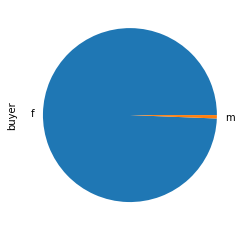

In [23]:
df['buyer'].value_counts().plot(kind='pie')

In [36]:
df.dropna()

,order_date,category,brand,price,buyer,colour1,colour2,type,date,year,month,sub_category
1,2018-12-02 13:53:42 UTC,"[jewelry, pendant]",1.0,54,f,white,gold,sapphire,2018-12-02,2018,12,pendant
2,2018-12-02 17:44:02 UTC,"[jewelry, pendant]",0.0,88,f,red,gold,diamond,2018-12-02,2018,12,pendant
7,2018-12-03 07:03:49 UTC,"[jewelry, pendant]",2.0,60,f,red,gold,pearl,2018-12-03,2018,12,pendant
18,2018-12-04 19:55:22 UTC,"[jewelry, earring]",1.0,102,f,yellow,gold,garnet,2018-12-04,2018,12,earring
19,2018-12-04 20:10:22 UTC,"[jewelry, pendant]",1.0,61,f,yellow,gold,garnet,2018-12-04,2018,12,pendant
...,...,...,...,...,...,...,...,...,...,...,...,...
95887,2021-12-01 08:56:09 UTC,"[jewelry, ring]",2.0,527,f,red,gold,diamond,2021-12-01,2021,12,ring
95888,2021-12-01 08:57:17 UTC,"[jewelry, earring]",1.0,1308,f,red,gold,topaz,2021-12-01,2021,12,earring
95896,2021-12-01 09:15:46 UTC,"[jewelry, pendant]",1.0,91,f,red,gold,fianit,2021-12-01,2021,12,pendant
95899,2021-12-01 09:23:52 UTC,"[jewelry, earring]",1.0,821,f,red,gold,diamond,2021-12-01,2021,12,earring


In [37]:
df

,order_date,category,brand,price,buyer,colour1,colour2,type,date,year,month,sub_category
1,2018-12-02 13:53:42 UTC,"[jewelry, pendant]",1.0,54,f,white,gold,sapphire,2018-12-02,2018,12,pendant
2,2018-12-02 17:44:02 UTC,"[jewelry, pendant]",0.0,88,f,red,gold,diamond,2018-12-02,2018,12,pendant
3,2018-12-02 21:30:19 UTC,"[jewelry, necklace]",0.0,417,NaN,red,gold,amethyst,2018-12-02,2018,12,necklace
4,2018-12-02 22:09:34 UTC,"[jewelry, earring]",1.0,102,NaN,red,gold,NaN,2018-12-02,2018,12,earring
5,2018-12-02 22:09:34 UTC,"[jewelry, earring]",0.0,150,NaN,red,gold,diamond,2018-12-02,2018,12,earring
...,...,...,...,...,...,...,...,...,...,...,...,...
95900,2021-12-01 09:32:35 UTC,"[jewelry, ring]",0.0,145,NaN,red,gold,NaN,2021-12-01,2021,12,ring
95903,2021-12-01 09:37:28 UTC,"[jewelry, earring]",0.0,301,NaN,red,gold,amethyst,2021-12-01,2021,12,earring
95907,2021-12-01 09:52:06 UTC,"[jewelry, earring]",1.0,630,f,white,gold,diamond,2021-12-01,2021,12,earring
95908,2021-12-01 09:55:35 UTC,"[jewelry, earring]",0.0,83,NaN,white,gold,fianit,2021-12-01,2021,12,earring


In [38]:
df.to_csv("ss.csv")

In [24]:
df_men = pd.DataFrame(df[df['buyer']=='m'])

In [25]:
df_men.groupby('sub_category').count()

,order_date,category,brand,price,buyer,colour1,colour2,type,date,year,month
sub_category,,,,,,,,,,,
bracelet,13,13,10,13,13,2,13,0,13,13,13
clocks,45,45,39,45,45,2,45,0,45,45,45
pendant,12,12,12,12,12,12,12,0,12,12,12
ring,210,210,150,210,210,210,210,63,210,210,210


In [26]:
df1 = pd.DataFrame(df.drop(columns='brand'))

In [27]:
df1.head()

,order_date,category,price,buyer,colour1,colour2,type,date,year,month,sub_category
1,2018-12-02 13:53:42 UTC,"[jewelry, pendant]",54,f,white,gold,sapphire,2018-12-02,2018,12,pendant
2,2018-12-02 17:44:02 UTC,"[jewelry, pendant]",88,f,red,gold,diamond,2018-12-02,2018,12,pendant
3,2018-12-02 21:30:19 UTC,"[jewelry, necklace]",417,NaN,red,gold,amethyst,2018-12-02,2018,12,necklace
4,2018-12-02 22:09:34 UTC,"[jewelry, earring]",102,NaN,red,gold,NaN,2018-12-02,2018,12,earring
5,2018-12-02 22:09:34 UTC,"[jewelry, earring]",150,NaN,red,gold,diamond,2018-12-02,2018,12,earring


In [28]:
df1.groupby(['year','month'])['type'].count().unstack('year')

year,2018,2019,2020,2021
month,,,,
1,NaN,400.0,1250.0,2508.0
2,NaN,514.0,1270.0,2449.0
3,NaN,443.0,1124.0,3122.0
4,NaN,437.0,386.0,2501.0
5,NaN,407.0,399.0,2582.0
6,NaN,462.0,763.0,2632.0
7,NaN,656.0,1223.0,2936.0
8,NaN,745.0,1732.0,4511.0
9,NaN,468.0,1438.0,3167.0


<AxesSubplot:xlabel='month'>

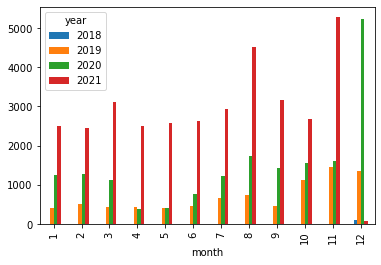

In [29]:
df1.groupby(['year','month'])['type'].count().unstack('year').plot(kind='bar')

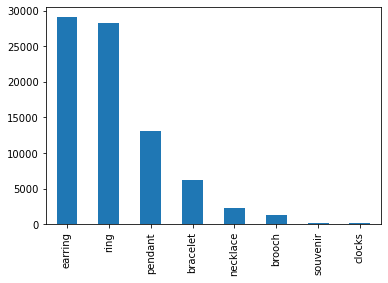

In [30]:
df1['sub_category'].value_counts().plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'total sales by jewelry category')

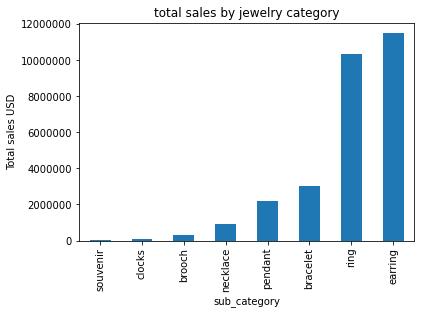

In [31]:
df1.groupby('sub_category')['price'].sum().sort_values().plot(kind='bar')
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('Total sales USD')
plt.title('total sales by jewelry category')

In [32]:
df1['type'].value_counts()

diamond                29506
fianit                 11924
topaz                   6286
pearl                   3632
garnet                  2704
sapphire                1866
amethyst                1632
mix                      896
emerald                  833
quartz                   540
amber                    228
spinel                   156
ruby                     151
quartz_smoky              93
nanocrystal               88
nacre                     78
chrysolite                74
citrine                   51
tourmaline                50
sitall                    44
corundum_synthetic        41
coral                     41
agate                     24
turquoise                 22
rhodolite                 18
emerald_geothermal         9
chrysoprase                6
onyx                       6
garnet_synthetic           6
sapphire_geothermal        2
Name: type, dtype: int64

In [33]:
toprocks = ['diamond','fianit','topaz']
df_toprocks = df1[df1['type'].isin(toprocks)]

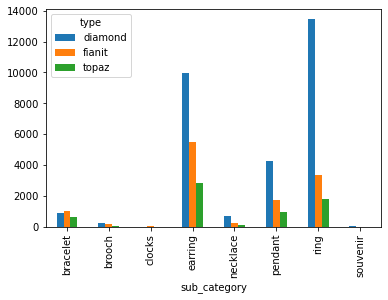

In [34]:
df_toprocks.groupby(['type','sub_category'])['month'].count().unstack('type').plot(kind='bar')
plt.show()

In [35]:
df1.to_csv("new.csv")

In [1]:
k = 0
for i in range(199):
    for j in range(399):
        k = k+1

print(k)

79401
